# Evaluado de métricas

 - En este cuaderno iremos evaluando cada estrategia definida en el proyecto.
 - Para cada una crearemos una gráfica que muestre las diferencias entre el proceso si y con reranking

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

search_type = "similarity" # ["similarity", "mmr", "tfidf", "bm25", "grafo"]

llm = "mistral-small"
db = "snow_1024"

In [16]:
data = "eval/" + llm + "/" + db + "/csv/eval_" + search_type + ".csv"
data_rr = "eval/" + llm + "/" + db + "/csv/eval_" + search_type + "_rr.csv"
name = search_type

In [17]:
df = pd.read_csv(data, on_bad_lines="skip")
df_rr = pd.read_csv(data_rr, on_bad_lines="skip")

# df = df[df['respuesta generada'] != 'No lo sé.']
# df_rr = df_rr[df_rr['respuesta generada'] != 'No lo sé.']
# name += "_cleaned"

 - Definimos las columnas de las métricas y combinamos los dataframes

In [18]:
scores_columns = ["accuracy", "faithfulness", "groundedness", "relevance"]

scores_df = round(df[scores_columns].mean(), 2)
scores_df_rr = round(df_rr[scores_columns].mean(), 2)

combined_df = pd.DataFrame({
    "Métrica": scores_columns * 2,
    "Puntuación promedio": list(scores_df.values) + list(scores_df_rr.values),
    "Método": ["Sin reranking"] * len(scores_columns) + ["Con reranking"] * len(scores_columns)
})

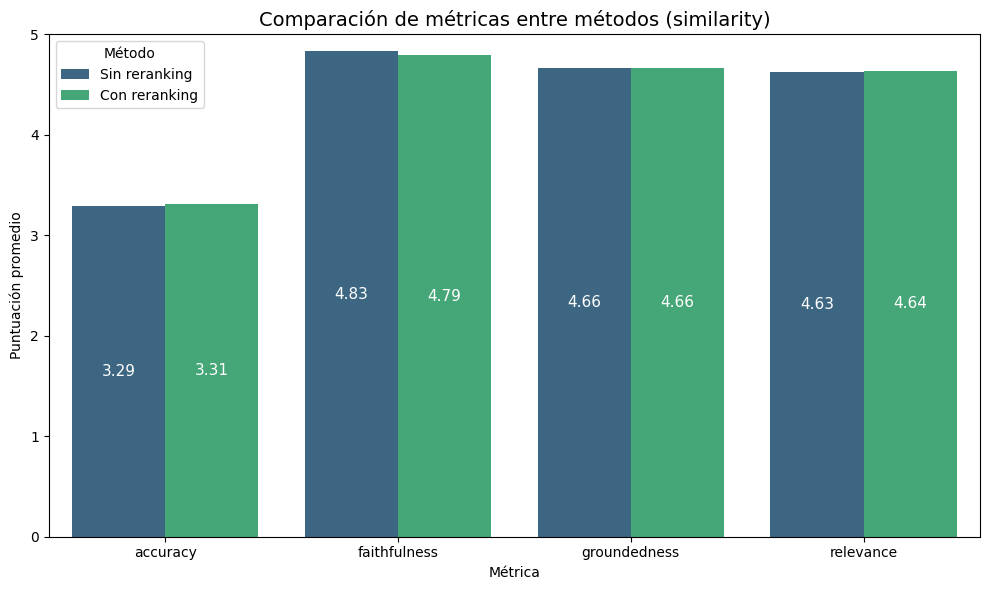

In [19]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=combined_df, x="Métrica", y="Puntuación promedio", hue="Método", palette="viridis")

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='center', color='white', fontsize=11)

plt.title(f"Comparación de métricas entre métodos ({search_type})", fontsize=14)
plt.ylim(0, 5)
plt.tight_layout()
plt.savefig(f"eval/{llm}/{db}/{name}.png", dpi=300, bbox_inches="tight")
plt.show()